# The Movie Industry (1980 - 2020) Performance Analytics 

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #To adjust the configuration of the plots

# Import Data

Data downloaded from https://www.kaggle.com/datasets/danielgrijalvas/movies

In [38]:
# Read in the data as a DataFrame
df = pd.read_csv(r"C:\Users\HP\Downloads\CSVs\movies.csv")

# Check shape and column info of data
print("The shape of the DataFrame is:", df.shape)
print()

# Take a look at the first 5 rows of the data
df.head()

The shape of the DataFrame is: (7668, 15)



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data Cleaning

### Missing data

Checking the number (and percentage) of missing values per column

In [21]:
for col in df.columns:
    n_missing = df[col].isnull().sum() # Returns the number of missing values per column
    percent_missing = round(np.mean(df[col].isnull())*100,2) # Returns the percentage of missing values per column rounded to 2 d.p
    print(f'{col}: {n_missing} ({percent_missing}%)')

name: 0 (0.0%)
rating: 77 (1.0%)
genre: 0 (0.0%)
year: 0 (0.0%)
released: 2 (0.03%)
score: 3 (0.04%)
votes: 3 (0.04%)
director: 0 (0.0%)
writer: 3 (0.04%)
star: 1 (0.01%)
country: 3 (0.04%)
budget: 2171 (28.31%)
gross: 189 (2.46%)
company: 17 (0.22%)
runtime: 4 (0.05%)


Since the dataset contains fairly large amount of missing values, we will need to remove the missing value entries from the dataset

In [39]:
df = df.dropna()
print("The shape of the DataFrame after dropping the null values: ", df.shape)

The shape of the DataFrame after dropping the null values:  (5421, 15)


Rechecking each columns for missing values

In [40]:
for col in df.columns:
    n_missing = df[col].isnull().sum() # Returns the number of missing values per column
    percent_missing = round(np.mean(df[col].isnull())*100,2) # Returns the percentage of missing values per column rounded to 2 d.p
    print(f'{col}: {n_missing} ({percent_missing}%)')

name: 0 (0.0%)
rating: 0 (0.0%)
genre: 0 (0.0%)
year: 0 (0.0%)
released: 0 (0.0%)
score: 0 (0.0%)
votes: 0 (0.0%)
director: 0 (0.0%)
writer: 0 (0.0%)
star: 0 (0.0%)
country: 0 (0.0%)
budget: 0 (0.0%)
gross: 0 (0.0%)
company: 0 (0.0%)
runtime: 0 (0.0%)


### Changing datatypes to a more convenient fit

In [41]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Converting 'votes', 'budget', 'gross', and 'runtime' to integers

In [42]:
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


Extracting the release year from the 'released' column, to check whether the year in the 'year' and 'released' columns are one and same

In [52]:
# Extract and create 'release_year' column
df['release_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [63]:
# To check if 'year' and 'release_year' columns are one and same
corr = df.release_year.corr(df['year'])
print(corr)
if corr == 1:
    print("Both columns are one and same")
else:
    print("There is a slight difference between the year values in both columns")

0.9987260944744509
There is a slight difference between the year values in both columns


Delete the 'year' and 'released' columns

In [67]:
df.drop(columns=['year','released'], inplace=True)
df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


Sort values from the highest 'gross' (revenue generated) to the lowest

In [80]:
df = df.sort_values(by='gross', ascending=False)
df = df.reindex(columns=['name', 'rating', 'genre','release_year','score', 'votes','budget', 'gross','runtime','director', 'writer', 'star', 'country', 'company'])
df.head()

,name,rating,genre,release_year,score,votes,budget,gross,runtime,director,writer,star,country,company
5445,Avatar,PG-13,Action,2009,7.8,1100000,237000000,2847246203,162,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,356000000,2797501328,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios
3045,Titanic,PG-13,Drama,1997,7.8,1100000,200000000,2201647264,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,245000000,2069521700,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,321000000,2048359754,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios


# Exploration

### Finding correlations in the Data

Checking for variables/features correlated with gross (revenues generated)

Gross vs Budget

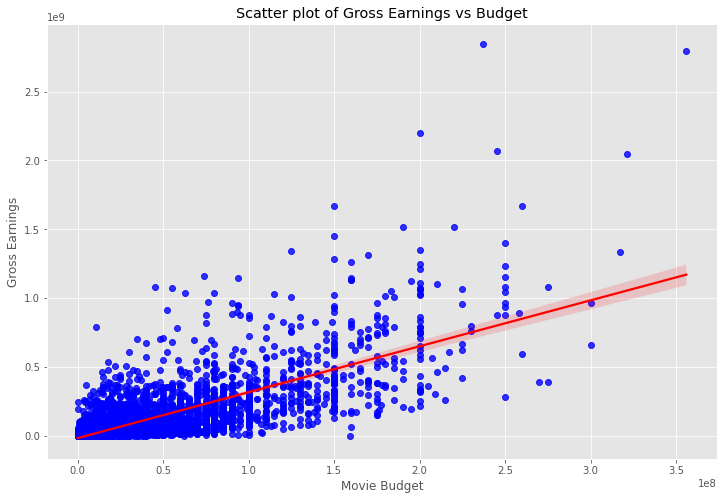

In [98]:
sns.regplot(x=df.budget, y=df.gross, scatter_kws={"color":"blue"}, line_kws={"color":"red"})
plt.title("Scatter plot of Gross Earnings vs Budget")
plt.xlabel("Movie Budget")
plt.ylabel("Gross Earnings");

Checking for other correlations

In [111]:
df.drop(columns=['release_year']).corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


Visualizing the correlation matrix above...

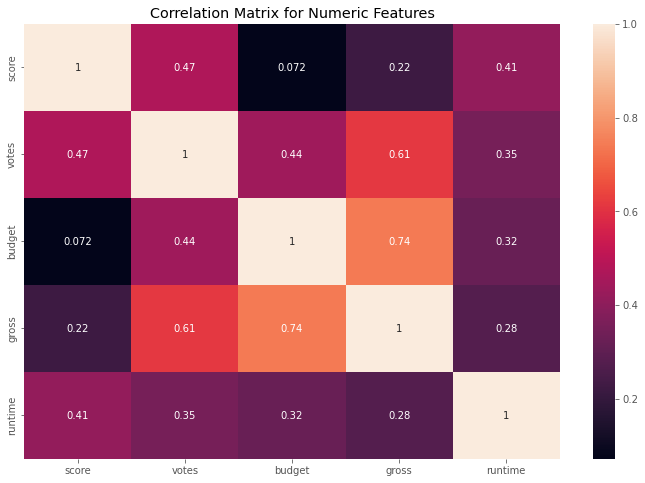

In [117]:
corr = df.drop(columns=['release_year']).corr(method='pearson')
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

'budget' and 'votes' are both positively correlated with 'gross'

### Checking Relationship between Gross Earnings and Production Company

In [248]:
comp_gross = df.gross.groupby(df.company).mean().sort_values(ascending=False).rename("mean gross").to_frame()
comp_gross.head()

,mean gross
company,
Marvel Studios,1.255466e+09
Illumination Entertainment,1.097122e+09
Fairview Entertainment,9.665549e+08
B24,8.806815e+08
Avi Arad Productions,8.560852e+08


Visualizing the result...

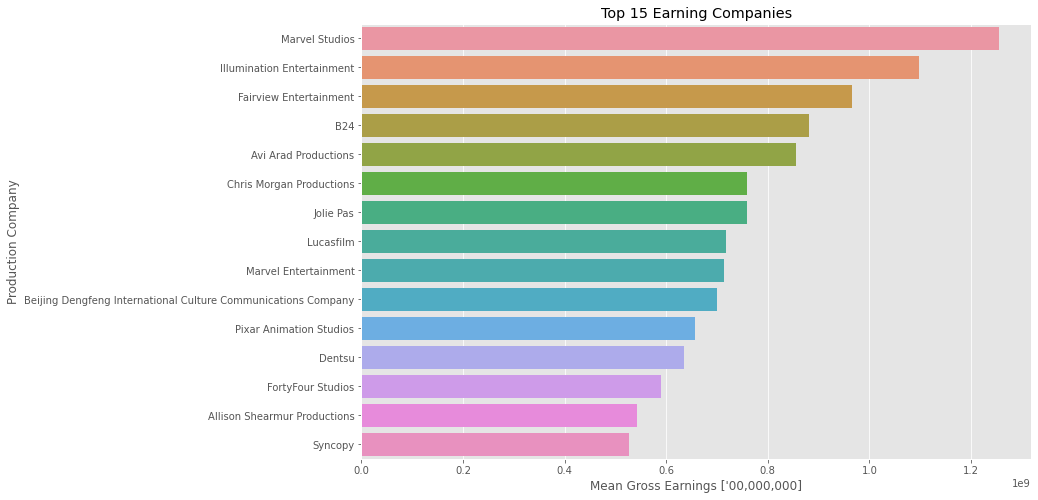

In [253]:
data = comp_gross.head(15)
sns.barplot(x="mean gross", y=data.index, data=data)
plt.title('Top 15 Earning Companies')
plt.xlabel("Mean Gross Earnings ['00,000,000]")
plt.ylabel('Production Company');

### Checking Relationship between Gross Earnings and Country of Production 

In [228]:
coun_gross = df.gross.groupby(df.country).mean().sort_values(ascending=False).rename("mean gross").to_frame()
coun_gross.head()

,mean gross
country,
Malta,3.527941e+08
New Zealand,3.487975e+08
Finland,2.500630e+08
China,2.425353e+08
South Africa,1.379522e+08


Visualizing the result...

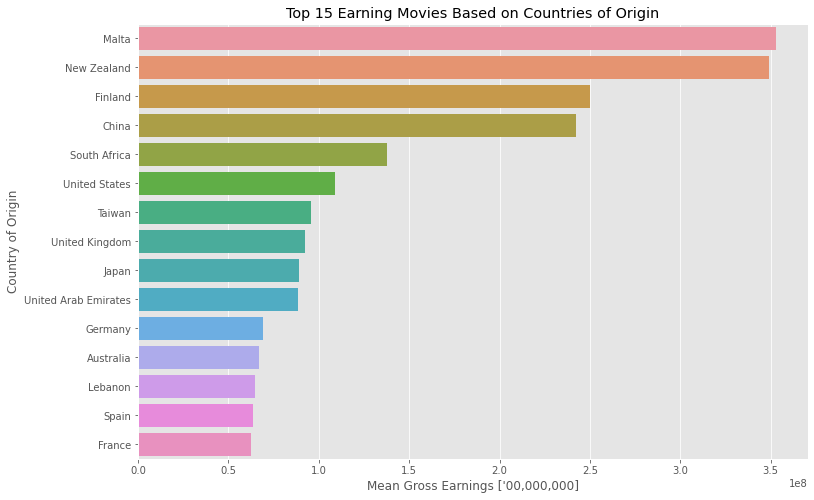

In [241]:
data = coun_gross.head(15)
sns.barplot(x="mean gross", y=data.index, data=data)
plt.title('Top 15 Earning Movies Based on Countries of Origin')
plt.xlabel("Mean Gross Earnings ['00,000,000]")
plt.ylabel('Country of Origin');

### Checking Relationship between Gross Earnings and Movie Genre


In [281]:
genre_gross = df.gross.groupby(df.genre).mean().sort_values(ascending=False).rename("mean gross").to_frame()
genre_gross.head()

,mean gross
genre,
Family,5.185831e+08
Animation,2.811044e+08
Action,1.680232e+08
Adventure,1.332682e+08
Mystery,1.178877e+08


Visualizing the result...

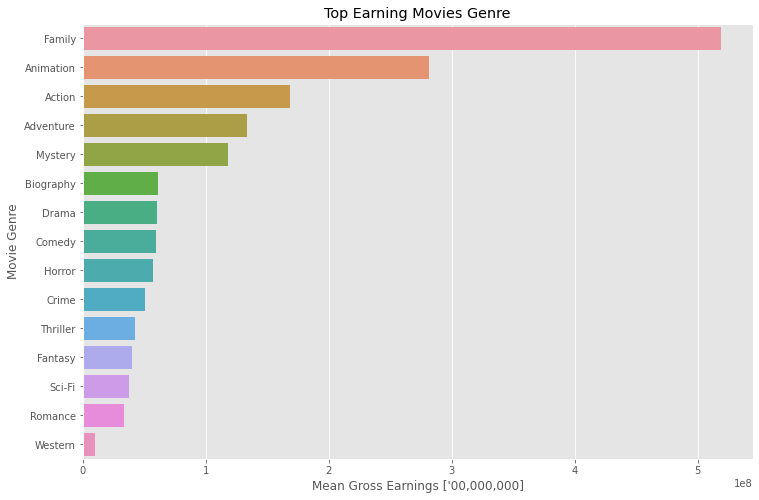

In [284]:
data = genre_gross
sns.barplot(x="mean gross", y=data.index, data=data)
plt.title('Top Earning Movies Genre')
plt.xlabel("Mean Gross Earnings ['00,000,000]")
plt.ylabel('Movie Genre');

### Checking Relationship between Gross Earnings and Movie Genre


In [295]:
rating_gross = df.gross.groupby(df.rating).mean().sort_values(ascending=False).rename("mean gross").to_frame()
rating_gross

,mean gross
rating,
TV-MA,3.500416e+08
G,1.892453e+08
PG-13,1.541598e+08
PG,1.377396e+08
R,5.591059e+07
Approved,3.656528e+07
Not Rated,2.146428e+07
X,1.718635e+07
NC-17,1.594226e+07


Visualizing the result...

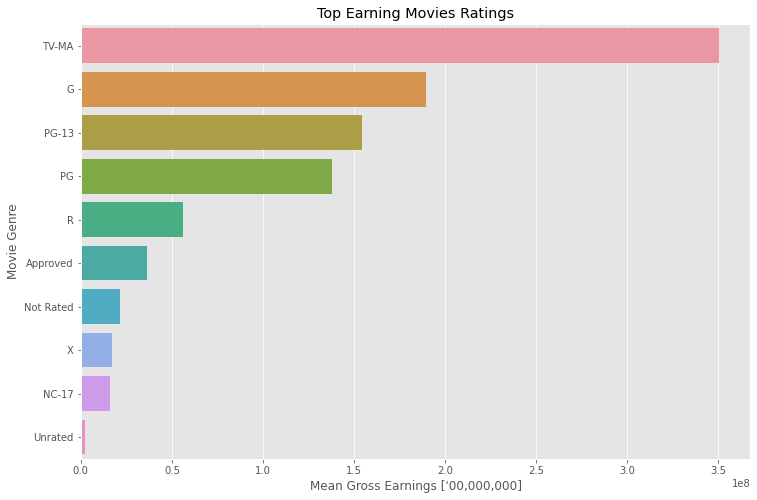

In [297]:
data = rating_gross
sns.barplot(x="mean gross", y=data.index, data=data)
plt.title('Top Earning Movies Ratings')
plt.xlabel("Mean Gross Earnings ['00,000,000]")
plt.ylabel('Movie Genre');

### Checking Relationship between Gross Earnings and Movie Star

In [312]:
star_gross = df.gross.groupby(df.star).mean().sort_values(ascending=False).rename("Mean Gross").to_frame()
starr.head(10)

,Mean Gross
star,
Donald Glover,1.670728e+09
Daisy Ridley,1.493484e+09
Chadwick Boseman,1.347598e+09
Emma Watson,1.264435e+09
Jason Momoa,1.148486e+09
Felicity Jones,1.056058e+09
Ellen DeGeneres,1.028571e+09
Chris Pratt,1.017230e+09
Tom Holland,1.006047e+09


Visualizing the result...

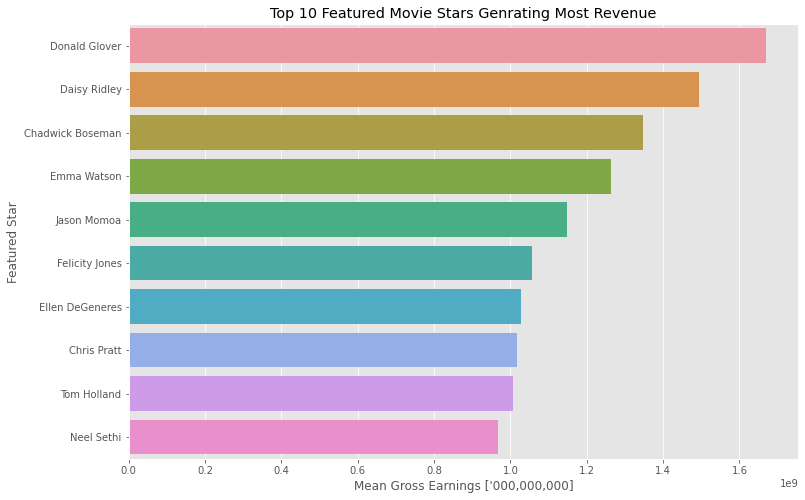

In [315]:
data = starr.head(10)
sns.barplot(x="Mean Gross", y=data.index, data=data)
plt.title("Top 10 Featured Movie Stars Genrating Most Revenue")
plt.xlabel("Mean Gross Earnings ['000,000,000]")
plt.ylabel("Featured Star");

### Gross Earnings Over the Years

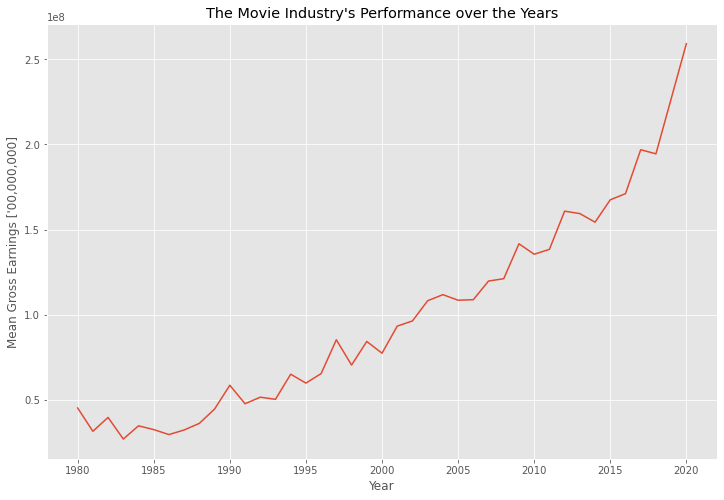

In [291]:
gross_year = df.gross.groupby(df.release_year).mean().sort_values().rename("Mean Gross").to_frame()
data = gross_year
sns.lineplot(x=data.index, y="Mean Gross", data=data)
plt.title("The Movie Industry's Performance over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Gross Earnings ['00,000,000]");

## Other Findings

### Companies of Production with the Highest Movie Budget

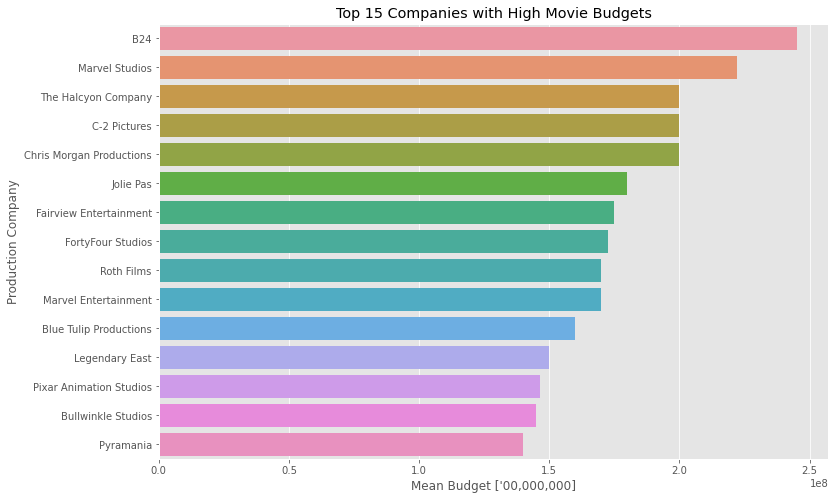

In [239]:
comp_budget = df.budget.groupby(df.company).mean().sort_values(ascending=False).rename("Average Budget").to_frame()
data = comp_budget.head(15)
sns.barplot(x="Average Budget", y=data.index, data=data)
plt.title('Top 15 Companies with High Movie Budgets')
plt.xlabel("Mean Budget ['00,000,000]")
plt.ylabel('Production Company');

### Movie Ratings of All Time

In [205]:
df.votes.describe() # Checking the decriptive statistics of voting

count    5.421000e+03
mean     1.150661e+05
std      1.844073e+05
min      1.950000e+02
25%      1.900000e+04
50%      5.200000e+04
75%      1.290000e+05
max      2.400000e+06
Name: votes, dtype: float64

In [212]:
df_hv = df[df.votes > 100_000] # Selecting only entries with over 100,000 votes
df_hv.head()

,name,rating,genre,release_year,score,votes,budget,gross,runtime,director,writer,star,country,company
5445,Avatar,PG-13,Action,2009,7.8,1100000,237000000,2847246203,162,James Cameron,James Cameron,Sam Worthington,United States,Twentieth Century Fox
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,356000000,2797501328,181,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios
3045,Titanic,PG-13,Drama,1997,7.8,1100000,200000000,2201647264,194,James Cameron,James Cameron,Leonardo DiCaprio,United States,Twentieth Century Fox
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,245000000,2069521700,138,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,Lucasfilm
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,321000000,2048359754,149,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,Marvel Studios


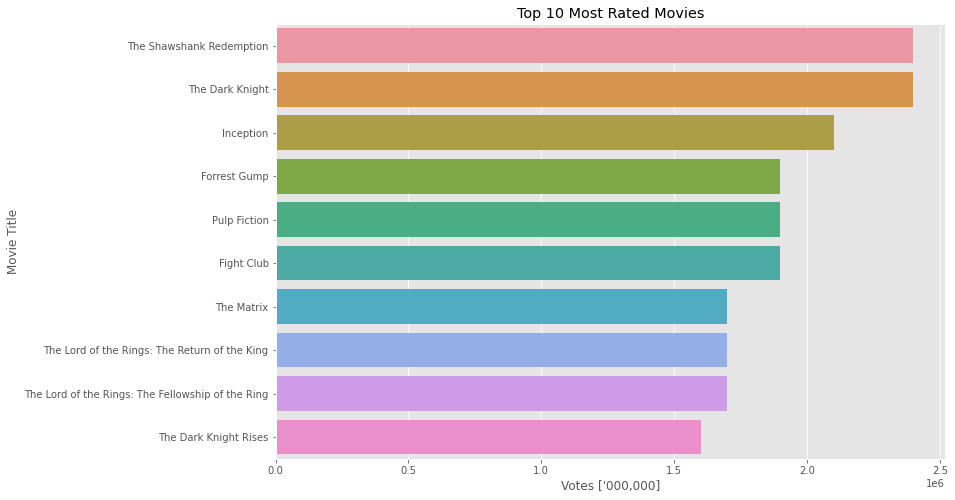

In [216]:
sns.barplot(x="votes", y="name", data=df_hv.sort_values("votes", ascending=False).head(10))
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Votes ['000,000]")
plt.ylabel("Movie Title");

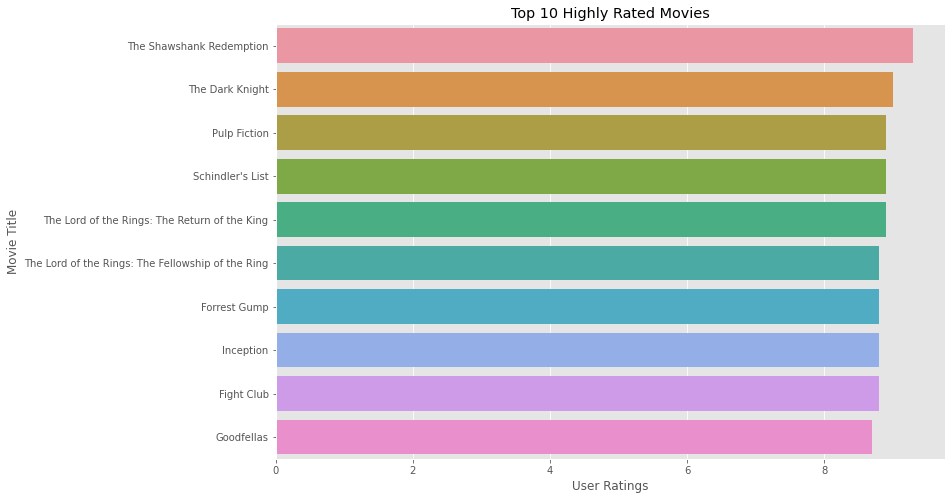

In [252]:
sns.barplot(x="score", y="name", data=df_hv.sort_values("score", ascending=False).head(10))
plt.title("Top 10 Highly Rated Movies")
plt.xlabel("User Ratings")
plt.ylabel("Movie Title");

### Top Directors based on Top Rated Movies 

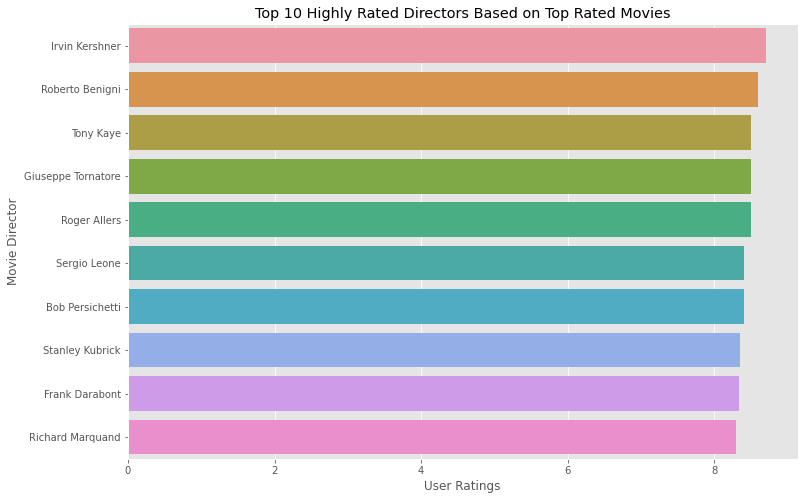

In [292]:
hr_dir = df_hv.score.groupby(df.director).mean().sort_values(ascending=False).rename("User Ratings").to_frame()
data = hr_dir.head(10)

sns.barplot(x="User Ratings", y=data.index, data=data)
plt.title("Top 10 Highly Rated Directors Based on Top Rated Movies")
plt.xlabel("User Ratings")
plt.ylabel("Movie Director");

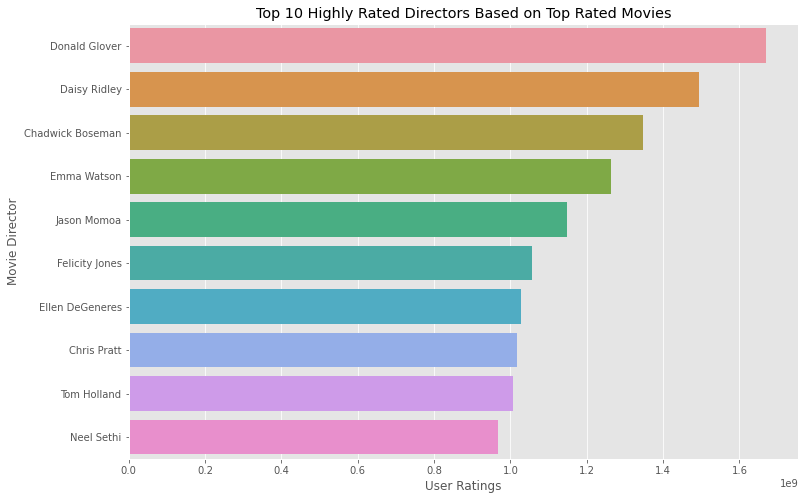

In [307]:
starr = df_hv.gross.groupby(df.star).mean().sort_values(ascending=False).rename("Mean Gross").to_frame()
data = starr.head(10)

sns.barplot(x="Mean Gross", y=data.index, data=data)
plt.title("Top 10 Highly Rated Directors Based on Top Rated Movies")
plt.xlabel("User Ratings")
plt.ylabel("Movie Director");


Thank You!!!